In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from PIL import Image

In [2]:
data_path = os.path.join(os.getcwd(), 'dataset')
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'test')
val_path = os.path.join(data_path, 'validation')

In [3]:
# get all image sizes
train_size = pd.DataFrame()
test_size = pd.DataFrame()
val_size = pd.DataFrame()

# train
imageid = []
width = []
height = []

for img in os.listdir(train_path):
    im=Image.open(os.path.join(train_path) + '\\' + img)
    size = im.size
    imageid.append(img.split('.')[0])
    width.append(size[0])
    height.append(size[1])

train_size['ImageID'] = imageid
train_size['ImageID'] = train_size['ImageID'].astype(str)
train_size['width'] = width
train_size['height'] = height
    

# test
imageid = []
width = []
height = []

for img in os.listdir(test_path):
    im=Image.open(os.path.join(test_path) + '\\' + img)
    size = im.size
    imageid.append(img.split('.')[0])
    width.append(size[0])
    height.append(size[1])

test_size['ImageID'] = imageid
test_size['ImageID'] = test_size['ImageID'].astype(str)
test_size['width'] = width
test_size['height'] = height
    
# val
imageid = []
width = []
height = []

for img in os.listdir(val_path):
    im=Image.open(os.path.join(val_path) + '\\' + img)
    size = im.size
    imageid.append(img.split('.')[0])
    width.append(size[0])
    height.append(size[1])

val_size['ImageID'] = imageid
val_size['ImageID'] = val_size['ImageID'].astype(str)
val_size['width'] = width
val_size['height'] = height

In [4]:
train_size.head()

,ImageID,width,height
0,0000615b5a80f660,1024,768
1,0000727e23603def,1024,768
2,000077165b72a53b,768,1024
3,000085351f54575c,1024,768
4,0000b9fcba019d36,1024,768


In [5]:
# read and merge size to full dataframe
train = pd.read_csv('train_labels.csv')
train['ImageID'] = train['ImageID'].astype(str)
train = pd.merge(train, train_size, left_on ='ImageID', right_on = 'ImageID', how = 'left')

test = pd.read_csv('test_labels.csv')
test['ImageID'] = test['ImageID'].astype(str)
test = pd.merge(test, test_size, left_on ='ImageID', right_on = 'ImageID', how = 'left')

val = pd.read_csv('val_labels.csv')
val['ImageID'] = val['ImageID'].astype(str)
val = pd.merge(val, val_size, left_on ='ImageID', right_on = 'ImageID', how = 'left')

In [6]:
# to create an index of classes that maps classes to numbers alphabetically
unique_classes = np.unique(train['Label'])
unique_classes.sort()
unique_df = pd.DataFrame()
unique_df['Label'] = unique_classes
unique_df['ClassNum'] = range(len(unique_classes))

# merge with train, test, val
train = pd.merge(train, unique_df, left_on='Label', right_on ='Label', how='left')
test = pd.merge(test, unique_df, left_on='Label', right_on ='Label', how='left')
val = pd.merge(val, unique_df, left_on='Label', right_on ='Label', how='left')

In [7]:
train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,Label,width,height,ClassNum
0,0000615b5a80f660,xclick,/m/0b3fp9,1,0.100000,0.701875,0.508333,0.622500,1,0,0,0,0,Countertop,1024,768,6
1,0000615b5a80f660,xclick,/m/0b3fp9,1,0.781875,0.999375,0.494167,0.894167,0,0,0,0,0,Countertop,1024,768,6
2,00011aec5d7324f4,xclick,/m/0b3fp9,1,0.305625,0.994375,0.620915,0.999066,0,0,0,0,0,Countertop,1024,685,6
3,0003fd45db1c5906,xclick,/m/0b3fp9,1,0.259804,0.998366,0.243464,0.436274,0,0,0,0,0,Countertop,1024,1024,6
4,0003fd45db1c5906,xclick,/m/0b3fp9,1,0.465686,0.996732,0.341503,0.818627,1,1,0,0,0,Countertop,1024,1024,6


Open Images Description: <br/>
Reference: https://storage.googleapis.com/openimages/web/download.html <br/>

 - ImageID: the image this box lives in. <br/>
 - Source: indicates how the box was made:
     - xclick are manually drawn boxes using the method presented in [1], were the annotators click on the four extreme points of the object. In V6 we release the actual 4 extreme points for all xclick boxes in train (13M), see below.
    - activemil are boxes produced using an enhanced version of the method [2]. These are human verified to be accurate at IoU>0.7.
 - LabelName: the MID of the object class this box belongs to. <br/>
 - Confidence: a dummy value, always 1. <br/>
 - XMin, XMax, YMin, YMax: coordinates of the box, in normalized image coordinates. XMin is in [0,1], where 0 is the leftmost pixel, and 1 is the rightmost pixel in the image. Y coordinates go from the top pixel (0) to the bottom pixel (1).
 - XClick1X, XClick2X, XClick3X, XClick4X, XClick1Y, XClick2Y, XClick3Y, XClick4Y: normalized image coordinates (as XMin, etc.) of the four extreme points of the object that produced the box using [1] in the case of xclick boxes. Dummy values of -1 in the case of activemil boxes.

Detectron2 labels <br/>

- file_name: the full path to the image file. Will apply rotation and flipping if the image has such exif information.
- height, width: integer. The shape of image.
- image_id (str or int): a unique id that identifies this image. Used during evaluation to identify the images, but a dataset may use it for different purposes.
- annotations (list[dict]): each dict corresponds to annotations of one instance in this image. Required by instance detection/segmentation or keypoint detection tasks.

Images with empty annotations will by default be removed from training, but can be included using DATALOADER.FILTER_EMPTY_ANNOTATIONS.

Each dict contains the following keys, of which bbox,bbox_mode and category_id are required:

    - bbox (list[float]): list of 4 numbers representing the bounding box of the instance.
    - bbox_mode (int): the format of bbox. It must be a member of structures.BoxMode. Currently supports: BoxMode.XYXY_ABS, BoxMode.XYWH_ABS.
    - category_id (int): an integer in the range [0, num_categories) representing the category label. The value num_categories is reserved to represent the “background” category, if applicable.
    - segmentation (list[list[float]] or dict): the segmentation mask of the instance.
        - If list[list[float]], it represents a list of polygons, one for each connected component of the object. Each list[float] is one simple polygon in the format of [x1, y1, ..., xn, yn]. The Xs and Ys are either relative coordinates in [0, 1], or absolute coordinates, depend on whether “bbox_mode” is relative.
        - If dict, it represents the per-pixel segmentation mask in COCO’s RLE format. The dict should have keys “size” and “counts”. You can convert a uint8 segmentation mask of 0s and 1s into RLE format by pycocotools.mask.encode(np.asarray(mask, order="F")).
    - keypoints (list[float]): in the format of [x1, y1, v1,…, xn, yn, vn]. v[i] means the visibility of this keypoint. n must be equal to the number of keypoint categories. The Xs and Ys are either relative coordinates in [0, 1], or absolute coordinates, depend on whether “bbox_mode” is relative. <br/>
    Note that the coordinate annotations in COCO format are integers in range [0, H-1 or W-1]. By default, detectron2 adds 0.5 to absolute keypoint coordinates to convert them from discrete pixel indices to floating point coordinates. <br/>
    - iscrowd: 0 (default) or 1. Whether this instance is labeled as COCO’s “crowd region”. Don’t include this field if you don’t know what it means.

- sem_seg_file_name: the full path to the ground truth semantic segmentation file. Required by semantic segmentation task. It should be an image whose pixel values are integer labels.

In [8]:
train_images = np.unique(train['ImageID'])
test_images = np.unique(test['ImageID'])
val_images = np.unique(val['ImageID'])

train_labels = []
test_labels = []
val_labels = []

In [9]:
def transform_to_labels(img, data_type='train'):
    # type and filter with only that image
    if data_type == 'train':
        data = train[train['ImageID'] == img]
    elif data_type == 'test':
        data = test[test['ImageID'] == img]
    elif data_type == 'val':
        data = val[val['ImageID'] == img]
    
    filename = os.path.join(os.getcwd(), 'dataset', data_type, img + '.jpg')
    width = int(data.iloc[0].loc['width'])
    height = int(data.iloc[0].loc['height'])    
    
    annotations = []
    
    for ind in range(data.shape[0]):
                            #bbox: [x0,y0, x1, y1]
        annotations.append({'bbox': [ data.iloc[ind].loc['XMin'] * width, data.iloc[ind].loc['YMin'] * height,
                                      data.iloc[ind].loc['XMax'] * width, data.iloc[ind].loc['YMax'] * height ],
                                      #(data.iloc[ind].loc['XMax'] - data.iloc[ind].loc['XMin']) * width, 
                                      #(data.iloc[ind].loc['YMax'] - data.iloc[ind].loc['YMin']) * height ],
                            'bbox_mode': 0,  ## NEED TO be replaced with BoxMode.XYXY_ABS
                            'category_id': int(data.iloc[ind].loc['ClassNum']) #,
                            #'segmentation': [],
                            #'area': (data.iloc[ind].loc['XMax'] - data.iloc[ind].loc['XMin']) * width * (data.iloc[ind].loc['YMax'] - data.iloc[ind].loc['YMin']) * height,
                            #'iscrowd': 0
                            })
    
    # append labels
    if data_type == 'train':
        train_labels.append({'file_name': filename, 'height': height, 'width': width, 
                             'image_id': img, 'annotations': annotations})
    elif data_type == 'test':
        test_labels.append({'file_name': filename, 'height': height, 'width': width, 
                     'image_id': img, 'annotations': annotations})
    elif data_type == 'val':
        val_labels.append({'file_name': filename, 'height': height, 'width': width, 
                            'image_id': img, 'annotations': annotations})

In [10]:
for img in train_images:
    train_labels.append(transform_to_labels(img, 'train'))
    
for img in test_images:
    test_labels.append(transform_to_labels(img, 'test'))

for img in val_images:
    val_labels.append(transform_to_labels(img, 'val'))
    

train_labels = [i for i in train_labels if i is not None]
test_labels = [i for i in test_labels if i is not None]
val_labels = [i for i in val_labels if i is not None]

In [11]:
val_labels[0]

{'file_name': 'C:\\Users\\Jonathan Santoso\\workspace3\\Personal Projects\\Amenity detection\\dataset\\val\\007f71665b0812a7.jpg',
 'height': 768,
 'width': 1024,
 'image_id': '007f71665b0812a7',
 'annotations': [{'bbox': [0.0, 0.5952, 1024.0, 768.0],
   'bbox_mode': 0,
   'category_id': 24}]}

In [12]:
with open('train.json', 'w') as fout:
    json.dump(train_labels , fout)

with open('test.json', 'w') as fout:
    json.dump(test_labels , fout)

with open('val.json', 'w') as fout:
    json.dump(val_labels , fout)

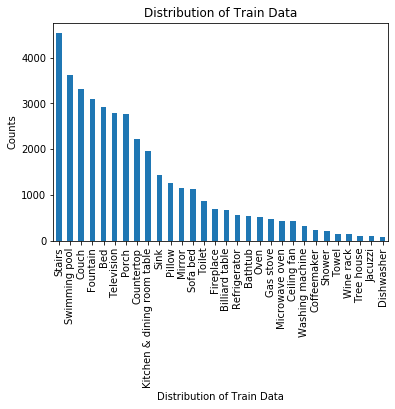

In [13]:
# Distribution of classes for each class
train_plot = train[['ImageID', 'Label']]
train_plot = train_plot.drop_duplicates()

train_plot['Label'].value_counts().plot(kind='bar')
plt.xlabel('Distribution of Train Data')
plt.ylabel('Counts')
plt.title('Distribution of Train Data');

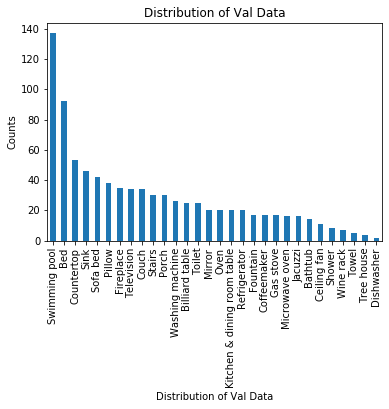

In [14]:
# Distribution of classes for each class
val_plot = val[['ImageID', 'Label']]
val_plot = val_plot.drop_duplicates()

val_plot['Label'].value_counts().plot(kind='bar')
plt.xlabel('Distribution of Val Data')
plt.ylabel('Counts')
plt.title('Distribution of Val Data');

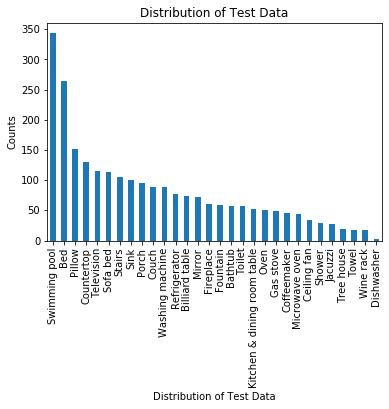

In [15]:
# Distribution of classes for each class
test_plot = test[['ImageID', 'Label']]
test_plot = test_plot.drop_duplicates()

test_plot['Label'].value_counts().plot(kind='bar')
plt.xlabel('Distribution of Test Data')
plt.ylabel('Counts')
plt.title('Distribution of Test Data');

Swimming pool tend to have the largest train, val, test data. Dishwasher has the lowest data. Distribution of data instances are quite similar.